# Textbook Problems

From Rawlings, Mayne, and Diehl.

* 1.16
* 1.17

Please turn these in during class on Fr

In [1]:
# This is code needed to run the assignment
# If you restart the notebook, you'll need to run this code again
import numpy as np
import matplotlib.pyplot as plt
import minecraftControl as mc
import scipy.linalg as la


%matplotlib inline

# Background: Numpy

We will work a lot with `numpy` matrices and vectors.


In [2]:
# We define matrices in numpy as follows:
M = np.array([[1.,-2.,0],
              [-3.,5.,8.]])

print('M:')
print(M)

M:
[[ 1. -2.  0.]
 [-3.  5.  8.]]



# Background: Numpy Vectors vs. Matrices

The code below demonstrates the distinction between vectors and matrices in Numpy. This is different from Matlab, and from how we typically do math. However, the Numpy conventions simplify several aspects of coding. 

Run the code below and understand the discinction. We will be using these conventions throughout the class.



In [3]:
print('Matrices are Numpy arrays with two indices:')
M = np.array([[1.,2],
              [0,4],
              [-1,6]])
print('M:')
print(M)
print('M[1,1]: ', M[1,1])
print('M[2,0]: ', M[2,0])

print('Matrices can also be interpreted as a list-of-lists.')
print('Specifically, the matrix is a list of rows')

print('M[0]: ', M[0])

print('In Numpy, is it common to represent vectors as arrays with just a single index:')
z = np.array([-2.0,3.,5.])
print('z: ',z)
print('z[0]: ', z[0])

Matrices are Numpy arrays with two indices:
M:
[[ 1.  2.]
 [ 0.  4.]
 [-1.  6.]]
M[1,1]:  4.0
M[2,0]:  -1.0
Matrices can also be interpreted as a list-of-lists.
Specifically, the matrix is a list of rows
M[0]:  [1. 2.]
In Numpy, is it common to represent vectors as arrays with just a single index:
z:  [-2.  3.  5.]
z[0]:  -2.0


# Multiplying Vectors and Matrices 

We saw above that vectors are represented by a single index, which is different from matrices (which have two indices). They are neither row vectors (which are matrices with one row), nor column vectors (which are matrices with one column). 

When multiplying vectors and matrices, Numpy determines from context whether a vector should be interpreted as a row or column vector. 

In [4]:
print('np.dot is the matrix multiplication command')
print('* does entry-by-entry multiplication, which is is not the same thing.')
print('np.dot treats vectors as either a row vector or column vector depending on which side they occur')
print('On the left, z acts as a row vector')
print('zM: ', np.dot(z,M))

print('As a shortcut, @ can be used instead of np.dot')
print('zM', z@M)

x = np.array([1.,1.])
print('x: ', x)
print('On the right, Numpy treats x as a column vector.')
print('When you print the result, it "looks" like a row vector, but these are the correct values')
print('Mx: ', np.dot(M,x))

print('np.dot treats multiplication of vectors as a dot product')
y = np.array([2.,3.])
print('y: ', y)
print("y\'x:", np.dot(y,x))

print('To get an outer product of vectors, instead use np.outer')
print("xy\':")
print(np.outer(x,y))

np.dot is the matrix multiplication command
* does entry-by-entry multiplication, which is is not the same thing.
np.dot treats vectors as either a row vector or column vector depending on which side they occur
On the left, z acts as a row vector
zM:  [-7. 38.]
As a shortcut, @ can be used instead of np.dot
zM [-7. 38.]
x:  [1. 1.]
On the right, Numpy treats x as a column vector.
When you print the result, it "looks" like a row vector, but these are the correct values
Mx:  [3. 4. 5.]
np.dot treats multiplication of vectors as a dot product
y:  [2. 3.]
y'x: 5.0
To get an outer product of vectors, instead use np.outer
xy':
[[2. 3.]
 [2. 3.]]


# Background: Matplotlib

The main plotting tool for Python is Matplotlib. Here is how to use it.

Text(0, 0.5, 'x')

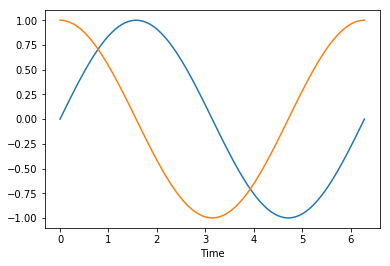

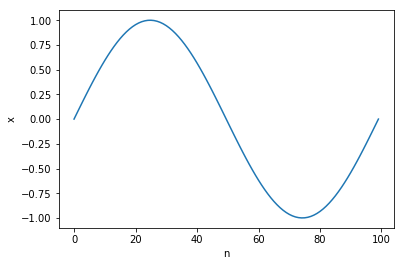

In [5]:
Time = np.linspace(0,2*np.pi,100)
x = np.sin(Time)
plt.plot(Time,x)
plt.xlabel('Time')

# By default, calling plot again adds the new data to the current axes
y = np.cos(Time)
plt.plot(Time,y)

# Here is how you can make a new figure
plt.figure()
# If we just pass one array, it will plot the sequence with integers on the x-axis
plt.plot(x)
plt.xlabel('n')
plt.ylabel('x')

# Question

Consider the scalar LQR problem from class:

\begin{align*}
& \min && \sum_{k=0}^{T-1}(x_k^2 + u_k^2) \\
& \textrm{subject to} && x_{k+1} = x_k + u_k
\end{align*}

Let $s_t^T$ be the numbers defined by
\begin{equation*}
    V_t(x_t) = s_t^T x_t^2 = \min_{u_t,\ldots,u_{T-1}} \sum_{k=t}^{T-1}(x_k^2+u_k^2)
\end{equation*}

For $T=1,\ldots,10$, compute the values of $s_0^T,\ldots,s_T^T$.

Plot them all on a single plot. 

Additionally, compute the steady-state value $s = \lim_{T\to\infty} s_t^T$. (For this problem, it is computable by hand. Otherwise, you can use the command `la.solve_discrete_are`.) Plot this value as well in order to compare the finite horizon solutions with the infinite horizon solutions. 


[[1.61803399]]


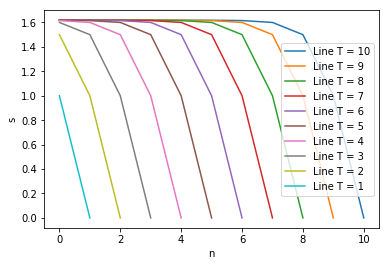

In [40]:
# Make your solution here
#print(x)
# by def s^T_0 = 0

A = 1
B = 1
Q = 1
R = 1
 
T_set = 10
for T in range(T_set,0,-1):
    s = np.zeros(T+1)
    for t in range(T,0,-1):
        s[t-1] = Q + A*s[t]*A - A*s[t]*B/(R+B*s[t]*B)*B*s[t]*A
    
    # If we just pass one array, it will plot the sequence with integers on the x-axis
    plt.plot(s,label='Line T = %d'%(T))

plt.xlabel('n')
plt.ylabel('s')
# A= [1] B = [1]


S_steady_state = la.solve_discrete_are(A, B, Q, R)

print(S_steady_state)



plt.legend()


# The Minecraft Control Environment

Andy is currently building an environment for simulations in the class. His goal is to make the syntax compatible with OpenAI gym, which we will use later in the RL component of the class. However, that functionality is not ready this week. So, for now, we'll have to live with some specialized syntax.

This week, the tasks will be about applying forces to a rolling ball to drive it to desired locations.

The dynamics have the form:

\begin{equation*}
x_{k+1} = A x_k + Bu_k
\end{equation*}

where $A$ and $B$ are given below.



In [41]:
A = np.array([[1,0,.3,0],
              [0,1,0,.3],
              [0,0,1,0],
              [0,0,0,1]])
B = np.array([[0,0],
              [0,0],
              [.1,0],
              [0,.1]])

The specialized command we will use is `mc.timedAffineSequence`, which builds a controller from a sequence of affine feedback policies: 
\begin{equation*}
u_k = G_k x_k + s_k
\end{equation*}

For compatibility with our model system, $G_k$ must be a $2\times 4$ matrix and $s_k$ must be a length-2 vector.

To see how this works, we'll give an example.

[[ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


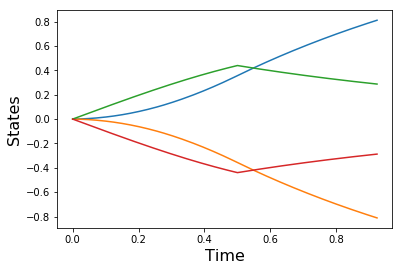

In [42]:
Gain1 = np.array([[-1.,0,0,0],
                  [0,-1,0,0]])
Gain2 = np.array([[0.,0,-1,0],
                  [0,0,0,-1]])


Gains = [Gain1,
         Gain1,
         Gain1,
         Gain1,
         Gain1,
         Gain2,
         Gain2,
         Gain2,
         Gain2,
         Gain2]

# Just make all of the constant offsets 0
s1 = np.array([1.,-1])
s2 = np.zeros(2)
# Here is a cleaner way of stacking a sequence of things
Vecs = np.vstack([np.tile(s1,(5,1)),np.tile(s2,(5,1))])

# These are the times to apply the controllers
dt = 0.1
TSamp = dt * np.arange(len(Gains))

controller = mc.timedAffineSequence(Gains,Vecs,TSamp)

Time,Traj = mc.ballSmall(controller)
print(Vecs)

# Question

Let $T=20$, $Q_k = 0$, $R_k = I$, and $S_T = 10\cdot I$

Find the sequence of feedback gains for the LQR problem:
\begin{align*}
&\min && \sum_{k=0}^{T-1}(x_k^\top Q_k x_k + u_k^\top R_k u_k) + x_T^\top S_T x_T \\
& \textrm{subject to} && x_{k+1} = A x_k + B u_k
\end{align*}

For testing purposes, call your sequence 

In [43]:
def dot(*mats):
    if len(mats)==1:
        return mats[0]
    else:
        return np.dot(mats[0],dot(*mats[1:]))
    

In [44]:
# Change this code 
T = 20
LQRGains = np.zeros((T,2,4))
Q = np.zeros((4,4))
R = np.eye(2,2)

S_T = 10* np.eye(4,4)
for t in range(T-1,-1,-1):
#for t in range(T):
    LQRGains[t,:,:] = -dot(la.inv(R + dot(B.T,S_T,B)),B.T,S_T,A)
    #S_T = la.solve_discrete_are(A, B, S_T, R)
    S_T = Q + dot(A.T,S_T,A) - dot(A.T,S_T,B,dot(la.inv(R + dot(B.T,S_T,B)),B.T,S_T,A))
    
#print(LQRGains)

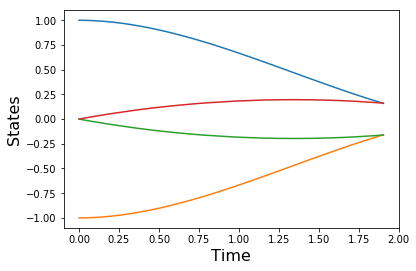

In [45]:
# Run this cell to test your gains
LQRVecs = np.zeros((T,2))
TSamp = dt * np.arange(T)

controller = mc.timedAffineSequence(LQRGains,LQRVecs,TSamp)

x0 = np.array([1.,-1,0,0])
Time,Traj = mc.ballSmall(controller,x0)

# Question

Modify the feedback policy so that instead of driving to the origin, it drives to the target state defined below:

In [46]:
x_target = np.array([-2.,1,0,0])


In [47]:
T = 30
LQRGains = np.zeros((T,2,4))

Q = np.zeros((4,4))
R = np.eye(2,2)
S_T = 10* np.eye(4,4)


newVecs = np.zeros((T,2))



#print(newVecs)




In [48]:

for t in range(T-1,-1,-1):
#for t in range(T):
    
    LQRGains[t,:,:] = -dot(la.inv(R + dot(B.T,S_T,B)),B.T,S_T,A)
    newVecs[t] = -dot(LQRGains[t,:,:],x_target)
   # S_T = la.solve_discrete_are(A, B, S_T, R)
    S_T = Q + dot(A.T,S_T,A) - dot(A.T,S_T,B,dot(la.inv(R + dot(B.T,S_T,B)),B.T,S_T,A))
    
    
    
    
    
    
#print(Q)

Modify the testing code so that you can see if you controller really drives to the new target.

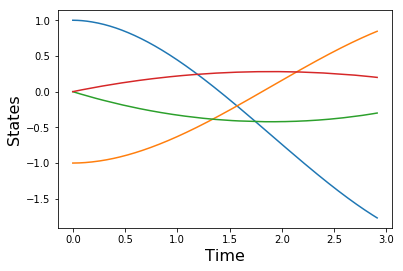

In [49]:
# Make your code here.

#targetVecs = np.vstack([np.tile(x_target[:2],(T,1))])

#newVecs = np.tile(x_target[:2],(T,1))
#newVecs = np.tile(x_target,(T,1))
#newVecs = np.tile(x0[:2],(T,1))

TSamp = dt * np.arange(T)

controller = mc.timedAffineSequence(LQRGains,newVecs,TSamp)

#x0 = np.array([1.,-1,0,0])
Time,Traj = mc.ballSmall(controller,x0)
#Time,Traj = mc.ballSmall(controller,x_target)


